In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글을 인식하게 해주는 코드

from matplotlib import font_manager,rc
import platform
import matplotlib

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기

In [4]:
test = pd.read_csv('./dataset/test.csv')
train = pd.read_csv('./dataset/train.csv')
age_gender = pd.read_csv('./dataset/age_gender_info.csv')

# 데이터 훑어보기

In [5]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [6]:
train.tail()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2951,C2532,239,아파트,강원도,국민임대,54.95,19,7.0,A,14830000,151030,0.0,1.0,166.0,146.0


In [7]:
train.shape

(2952, 15)

In [8]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [9]:
test.shape

(1022, 14)

In [10]:
age_gender.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [11]:
age_gender.shape

(16, 23)

In [12]:
train.info() # 임대보증금, 임대보증료,지하철, 버스정류장에 null값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [13]:
test.info() # 자격유형, 임대보증금, 임대료, 도보 10분거리 지하철역 수 null값이 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

# 중복데이터 제거 

In [14]:
train = train.drop_duplicates()

In [15]:
train.shape

(2632, 15)

# null값 처리

# train데이터의 null값 확인 

In [16]:
(train['임대보증금'].isnull()).sum()

292

In [17]:
(train['임대료'].isnull()).sum()

292

In [18]:
(train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

155

In [19]:
(train['도보 10분거리 내 버스정류장 수'].isnull()).sum()

4

In [20]:
train[train['공급유형']=='공공분양']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


## 임대보증금 처리 -> 평균값으로 대체

In [21]:
train[train['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


In [22]:
# '-' 값을 NaN값으로 변환
train[train['임대보증금']=='-'] = train[train['임대보증금']=='-'].replace('-',np.NAN)

In [23]:
# 특성 파악을 위해 float형태로 변환
train['임대보증금'] = train['임대보증금'].astype(float)

In [24]:
# 변경됨을 확인
(train['임대보증금'].isnull()).sum()

304

In [25]:
# '임대보증금'의 특성 확인
train['임대보증금'].describe()

count    2.328000e+03
mean     2.682653e+07
std      2.171244e+07
min      3.056000e+06
25%      1.441800e+07
50%      2.080100e+07
75%      3.244300e+07
max      2.164230e+08
Name: 임대보증금, dtype: float64

In [26]:
# 평균값 확인
mean = train['임대보증금'].mean()
mean = np.round(mean)
mean

26826528.0

In [27]:
#NaN값을 평균값으로 변경
train['임대보증금'] = train['임대보증금'].fillna(mean)

In [28]:
# 변경됨을 확인
(train['임대보증금'].isnull()).sum()

0

## 임대료 처리 -> 평균으로 대체

In [29]:
train[train['임대료'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,26826528.0,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,26826528.0,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,26826528.0,NaN,NaN,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,26826528.0,NaN,NaN,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,26826528.0,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,26826528.0,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,26826528.0,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,26826528.0,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,26826528.0,NaN,0.0,8.0,664.0,744.0


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2632 non-null   object 
 1   총세대수                          2632 non-null   int64  
 2   임대건물구분                        2632 non-null   object 
 3   지역                            2632 non-null   object 
 4   공급유형                          2632 non-null   object 
 5   전용면적                          2632 non-null   float64
 6   전용면적별세대수                      2632 non-null   int64  
 7   공가수                           2632 non-null   float64
 8   자격유형                          2632 non-null   object 
 9   임대보증금                         2632 non-null   float64
 10  임대료                           2328 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2477 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2628 non-null   float64
 13  단지내

In [31]:
# '-' 값을 NaN값으로 변환
train[train['임대료']=='-'] = train[train['임대료']=='-'].replace('-',np.NAN)

# 특성 파악을 위해 float형태로 변환
train['임대료'] = train['임대료'].astype(float)

In [32]:
# 변경됨을 확인
train[train['임대료']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [33]:
train['임대료'].describe()

count    2.319000e+03
mean     1.955080e+05
std      1.307436e+05
min      1.665000e+04
25%      1.105500e+05
50%      1.610200e+05
75%      2.359800e+05
max      1.058030e+06
Name: 임대료, dtype: float64

In [34]:
# 평균값 확인
mean = train['임대료'].mean()
mean = np.round(mean)
mean

195508.0

In [35]:
#NaN값을 평균값으로 변경
train['임대료'] = train['임대료'].fillna(mean)

In [36]:
# 변경됨을 확인
(train['임대료'].isnull()).sum()

0

## 지하철 처리 -> 0으로 변경

In [37]:
train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000.0,122210.0,NaN,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000.0,122210.0,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000.0,130940.0,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000.0,149660.0,NaN,3.0,527.0,359.0
98,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000.0,69900.0,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,C1350,1401,아파트,대전광역시,공공임대(10년),59.91,13,2.0,A,37474000.0,519350.0,NaN,6.0,1636.0,2315.0
2340,C1350,1401,아파트,대전광역시,공공임대(10년),59.92,223,2.0,A,37385000.0,516130.0,NaN,6.0,1636.0,2315.0
2341,C1350,1401,아파트,대전광역시,공공임대(분납),51.99,146,2.0,A,54612000.0,131130.0,NaN,6.0,1636.0,2315.0
2342,C1350,1401,아파트,대전광역시,공공임대(분납),59.91,32,2.0,A,63585000.0,152680.0,NaN,6.0,1636.0,2315.0


In [38]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts() #최빈값이 0이기 때문에 0으로 처리

0.0    2130
1.0     308
2.0      33
3.0       6
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [39]:
(train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

155

In [40]:
train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].value_counts()

C1616    16
C1875    16
C2258    16
C1874    16
C1004    15
C1350    13
C2583    10
C1983     8
C2100     6
C1068     6
C2644     6
C1649     4
C1312     4
C1704     4
C1005     3
C2156     3
C1175     3
C1424     3
C2216     2
C2520     1
Name: 단지코드, dtype: int64

In [41]:
# 단지코드가 같을 때 지하철역수를 대입하려고 했는데 모두 NaN 이라 실패 ..
code = ['C1616','C1875','C2258','C1874','C1004','C1350','C2583','C1983','C2100','C1068','C2644','C1649','C1312','C1704','C1005',
        'C2156','C1175','C1424','C2216','C2520']
for i in code:
    print(train[train['단지코드'] == 'i']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'])

Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: f

In [42]:
#NaN값을 0으로 변경
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

In [43]:
(train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

0

## 버스 처리 -> 0으로 변경

In [44]:
train[train['도보 10분거리 내 버스정류장 수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000.0,456000.0,0.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0


In [45]:
train['도보 10분거리 내 버스정류장 수'].value_counts() # 2값이 제일 많지만, 4건의 데이터이기때문에 0으로 처리

2.0     709
3.0     706
4.0     405
1.0     239
5.0     157
6.0     152
8.0      79
10.0     65
7.0      52
12.0     21
20.0     15
15.0     11
16.0      6
19.0      4
11.0      3
14.0      2
0.0       2
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

In [46]:
#NaN값을 0으로 변경
train['도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].fillna(0)

In [47]:
(train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

0

# test데이터의 null값 확인 

In [48]:
(test['자격유형'].isnull()).sum()

2

In [49]:
(test['임대보증금'].isnull()).sum()

180

In [50]:
(test['임대료'].isnull()).sum()

180

In [51]:
(test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

42

## 임대보증금 처리 -> 평균값으로

In [52]:
test[test['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0


In [53]:
test[test['임대보증금']=='-'] = test[test['임대보증금']=='-'].replace('-',np.NAN)
test['임대보증금'] = test['임대보증금'].astype(float)

In [54]:
# 평균값 확인
mean = test['임대보증금'].mean()
mean = np.round(mean)
mean

25050940.0

In [55]:
#NaN값을 평균값으로 변경
test['임대보증금'] = test['임대보증금'].fillna(mean)

In [56]:
# 변경됨을 확인
(test['임대보증금'].isnull()).sum()

0

## 임대료 처리 -> 평균값으로

In [57]:
test[test['임대료'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,25050940.0,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,25050940.0,NaN,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,25050940.0,NaN,2.0,5.0,428.0
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,25050940.0,NaN,2.0,5.0,428.0
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,25050940.0,NaN,2.0,5.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,C2152,120,아파트,강원도,영구임대,33.84,54,9.0,C,25050940.0,NaN,0.0,1.0,40.0
1014,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,25050940.0,NaN,0.0,1.0,467.0
1015,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,25050940.0,NaN,0.0,1.0,467.0
1016,C1267,675,아파트,경상남도,행복주택,26.85,8,38.0,L,25050940.0,NaN,0.0,1.0,467.0


In [58]:
test[test['임대료']=='-'] = test[test['임대료']=='-'].replace('-',np.NAN)
test['임대료'] = test['임대료'].astype(float)

In [59]:
# 평균값 확인
mean = test['임대료'].mean()
mean = np.round(mean)
mean

177574.0

In [60]:
#NaN값을 평균값으로 변경
test['임대료'] = test['임대료'].fillna(mean)

In [61]:
# 변경됨을 확인
(test['임대료'].isnull()).sum()

0

# 자격유형 처리

In [62]:
test[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [63]:
test[test['단지코드']=='C2411'] # c2411'단지의 자격유형은 'A'

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


In [64]:
test[test['단지코드']=='C2253'] # 단지코드와 공급유형이 모두 같은 'c'값으로 선택

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
265,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
267,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0


In [65]:
test.loc[(test.단지코드=='C2411')&test.자격유형.isnull(), '자격유형'] = 'A'
test.loc[(test.단지코드=='C2253')&test.자격유형.isnull(), '자격유형'] = 'C'

In [66]:
test[test['자격유형'].isnull()] # 변경됨을 확인

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수


## 지하철 처리 -> 0값으로 처리

In [67]:
test[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
68,C1472,548,아파트,충청남도,국민임대,36.62,116,2.0,A,8738000.0,87380.0,NaN,1.0,442.0
69,C1472,548,아파트,충청남도,국민임대,39.51,56,2.0,A,9985000.0,99850.0,NaN,1.0,442.0
70,C1472,548,아파트,충청남도,국민임대,46.79,56,2.0,A,13731000.0,131070.0,NaN,1.0,442.0
71,C1472,548,아파트,충청남도,국민임대,46.90,86,2.0,A,13731000.0,131070.0,NaN,1.0,442.0
72,C1472,548,아파트,충청남도,국민임대,51.93,234,2.0,A,18726000.0,143550.0,NaN,1.0,442.0
100,C1083,427,아파트,대전광역시,국민임대,39.85,40,0.0,A,12483000.0,106090.0,NaN,6.0,384.0
101,C1083,427,아파트,대전광역시,국민임대,51.48,64,0.0,A,32459000.0,187260.0,NaN,6.0,384.0
102,C1083,427,아파트,대전광역시,국민임대,51.99,107,0.0,A,32459000.0,187260.0,NaN,6.0,384.0
103,C1083,427,아파트,대전광역시,국민임대,51.99,96,0.0,A,32459000.0,187260.0,NaN,6.0,384.0
104,C1083,427,아파트,대전광역시,국민임대,59.45,120,0.0,A,39950000.0,243430.0,NaN,6.0,384.0


In [68]:
#NaN값을 0으로 변경
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

In [69]:
(test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

0

# age_gender 데이터 이용 
 - 지역데이터를 수치적인 의미가 있는 데이터로 사용하기 위해 컬럼을 추가

In [70]:
# 20대 이상의 합만 구하기 위해 20대 미만 삭제
age_gender_20=age_gender.drop(['10대미만(여자)','10대미만(남자)','10대(여자)','10대(남자)'],axis=1)

In [71]:
age_gender['20대이상총합'] = age_gender_20.sum(axis=1)

In [72]:
age_gender.head() # 컬럼추가 확인

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),20대이상총합
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014,0.818941
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.836873
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066,0.859429
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.815928
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.823080


## train, test데이터에 join

In [73]:
#train데이터에 지역에 따른 20대 이상의 비율 추가
train = pd.merge(train,age_gender[['지역','20대이상총합']],how='left',left_on='지역',right_on='지역')

In [74]:
#test데이터에 지역에 따른 20대 이상의 비율 추가
test = pd.merge(test,age_gender[['지역','20대이상총합']],how='left',left_on='지역',right_on='지역')

# 삭제할 컬럼 확인

In [75]:
corr = train.corr()
corr

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,20대이상총합
총세대수,1.000000,0.067498,0.168208,0.103241,0.065102,0.083760,0.131384,0.038483,0.598347,0.423656,0.296112
전용면적,0.067498,1.000000,-0.071887,-0.116087,0.187270,0.280833,-0.000607,-0.007341,0.035756,0.081118,0.085081
전용면적별세대수,0.168208,-0.071887,1.000000,0.151090,-0.093708,-0.053941,-0.024246,0.054413,0.231223,0.188906,0.027242
공가수,0.103241,-0.116087,0.151090,1.000000,0.030570,-0.178381,-0.110199,0.050872,0.292526,0.095454,-0.038823
임대보증금,0.065102,0.187270,-0.093708,0.030570,1.000000,0.491838,0.028010,0.101451,0.251715,0.283975,0.213541
임대료,0.083760,0.280833,-0.053941,-0.178381,0.491838,1.000000,0.069404,0.036539,0.255493,0.373893,0.167341
도보 10분거리 내 지하철역 수(환승노선 수 반영),0.131384,-0.000607,-0.024246,-0.110199,0.028010,0.069404,1.000000,0.106098,-0.028426,-0.063716,0.319448
도보 10분거리 내 버스정류장 수,0.038483,-0.007341,0.054413,0.050872,0.101451,0.036539,0.106098,1.000000,0.093102,0.117849,-0.044671
단지내주차면수,0.598347,0.035756,0.231223,0.292526,0.251715,0.255493,-0.028426,0.093102,1.000000,0.851280,0.019532
등록차량수,0.423656,0.081118,0.188906,0.095454,0.283975,0.373893,-0.063716,0.117849,0.851280,1.000000,-0.032255


<AxesSubplot:>

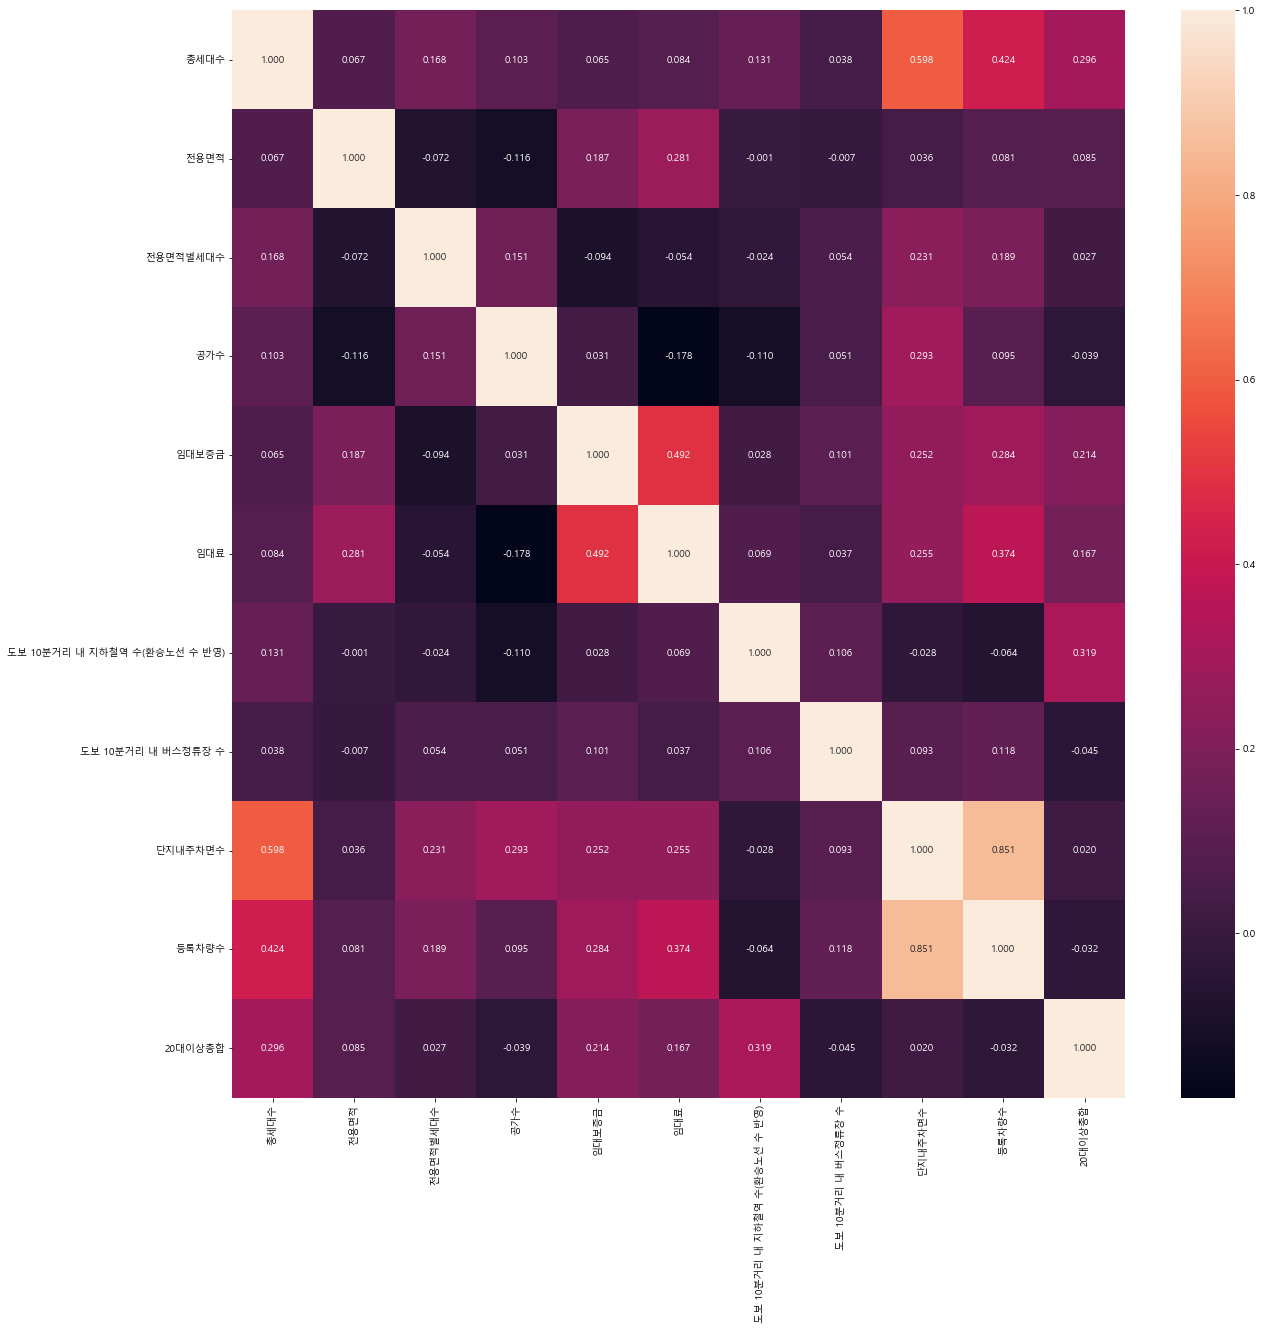

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.3f')

In [77]:
train.corr()['등록차량수'].sort_values() 

도보 10분거리 내 지하철역 수(환승노선 수 반영)   -0.063716
20대이상총합                        -0.032255
전용면적                            0.081118
공가수                             0.095454
도보 10분거리 내 버스정류장 수              0.117849
전용면적별세대수                        0.188906
임대보증금                           0.283975
임대료                             0.373893
총세대수                            0.423656
단지내주차면수                         0.851280
등록차량수                           1.000000
Name: 등록차량수, dtype: float64

In [78]:
# '단지내주차면수' 가 등록차량수와 가장 높은 상관관계가 있어서 이와 관련성이 높은 값 확인
train.corr()['단지내주차면수'].sort_values()

도보 10분거리 내 지하철역 수(환승노선 수 반영)   -0.028426
20대이상총합                         0.019532
전용면적                            0.035756
도보 10분거리 내 버스정류장 수              0.093102
전용면적별세대수                        0.231223
임대보증금                           0.251715
임대료                             0.255493
공가수                             0.292526
총세대수                            0.598347
등록차량수                           0.851280
단지내주차면수                         1.000000
Name: 단지내주차면수, dtype: float64

In [79]:
#삭제 - 지역(20대이상의비율과 같음), 공급유형(임대건물구분의 하위데이터), 
#       공가수(상관관계 매우작음), 자격유형(차량에대한 규제는 금액적인 부분만 들어감)

In [80]:
train = train.drop(['지역','공급유형','공가수','자격유형'],axis=1)

In [81]:
test = test.drop(['지역','공급유형','공가수','자격유형'],axis=1)

# 임대건물구분을 숫자데이터로 변환 
- 아파트 : 0, 상가:1 로 변환

In [82]:
# 아파트는 0, 상가는 1 로 변환
train['임대건물구분'] = train['임대건물구분'].map({'아파트':0, '상가':1})
test['임대건물구분'] = test['임대건물구분'].map({'아파트':0, '상가':1})

In [83]:
train

,단지코드,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,20대이상총합
0,C2483,900,0,39.72,134,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,0.818941
1,C2483,900,0,39.72,15,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,0.818941
2,C2483,900,0,51.93,385,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0.818941
3,C2483,900,0,51.93,15,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0.818941
4,C2483,900,0,51.93,41,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0.818941
...,...,...,...,...,...,...,...,...,...,...,...,...
2627,C2532,239,0,49.20,19,11346000.0,116090.0,0.0,1.0,166.0,146.0,0.836432
2628,C2532,239,0,51.08,34,14005000.0,142310.0,0.0,1.0,166.0,146.0,0.836432
2629,C2532,239,0,51.73,34,14005000.0,142310.0,0.0,1.0,166.0,146.0,0.836432
2630,C2532,239,0,51.96,114,14005000.0,142310.0,0.0,1.0,166.0,146.0,0.836432


In [84]:
test

,단지코드,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
0,C1072,754,0,39.79,116,22830000.0,189840.0,0.0,2.0,683.0,0.815928
1,C1072,754,0,46.81,30,36048000.0,249930.0,0.0,2.0,683.0,0.815928
2,C1072,754,0,46.90,112,36048000.0,249930.0,0.0,2.0,683.0,0.815928
3,C1072,754,0,46.90,120,36048000.0,249930.0,0.0,2.0,683.0,0.815928
4,C1072,754,0,51.46,60,43497000.0,296780.0,0.0,2.0,683.0,0.815928
...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,0,36.77,126,25050940.0,177574.0,0.0,1.0,467.0,0.836873
1018,C2189,382,0,29.19,96,6872000.0,106400.0,0.0,2.0,300.0,0.823080
1019,C2189,382,0,29.19,20,6872000.0,106400.0,0.0,2.0,300.0,0.823080
1020,C2189,382,0,39.45,202,13410000.0,144600.0,0.0,2.0,300.0,0.823080


# x,y값 나누기

In [85]:
x_train = train.drop(['등록차량수'],axis=1)
y_train = train['등록차량수']

# 데이터 시각화

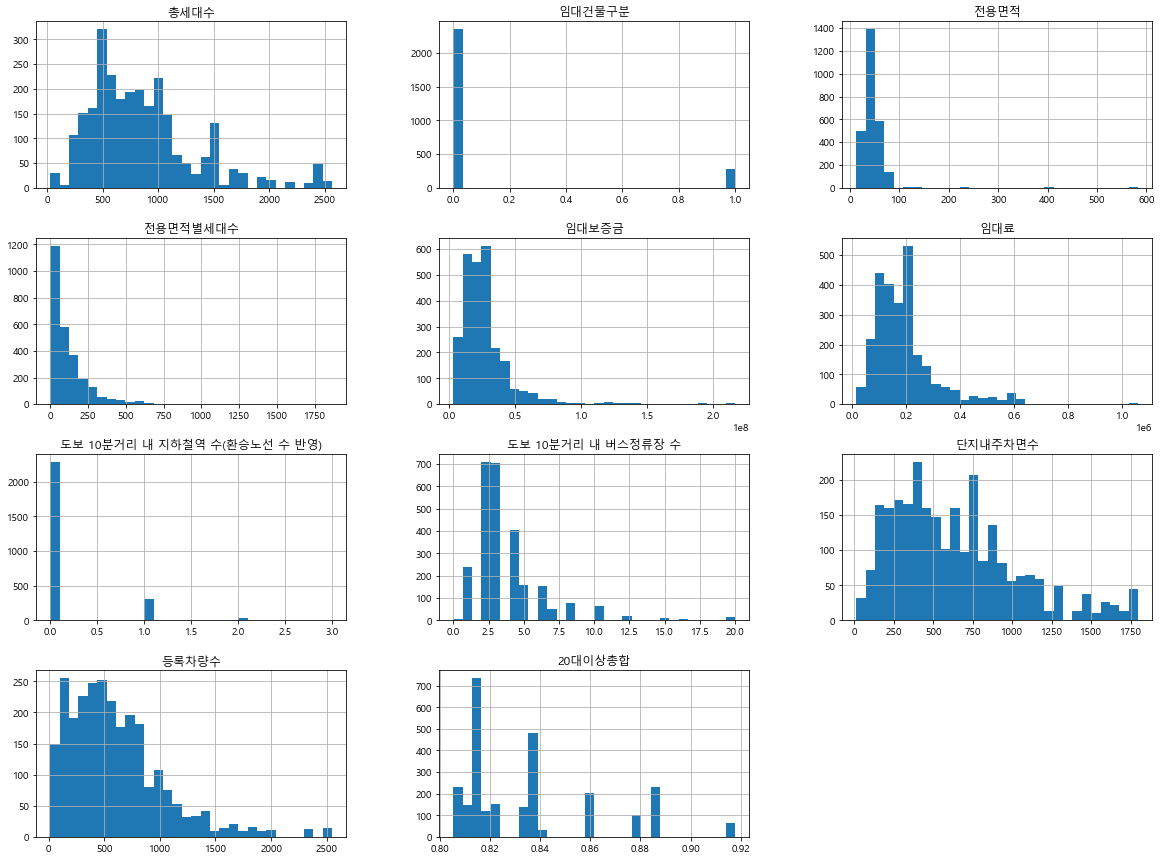

In [86]:
# 히스토그램
h = train.hist(bins=30,figsize=(20,15))

[Text(0.5, 1.0, '단지내주차면수')]

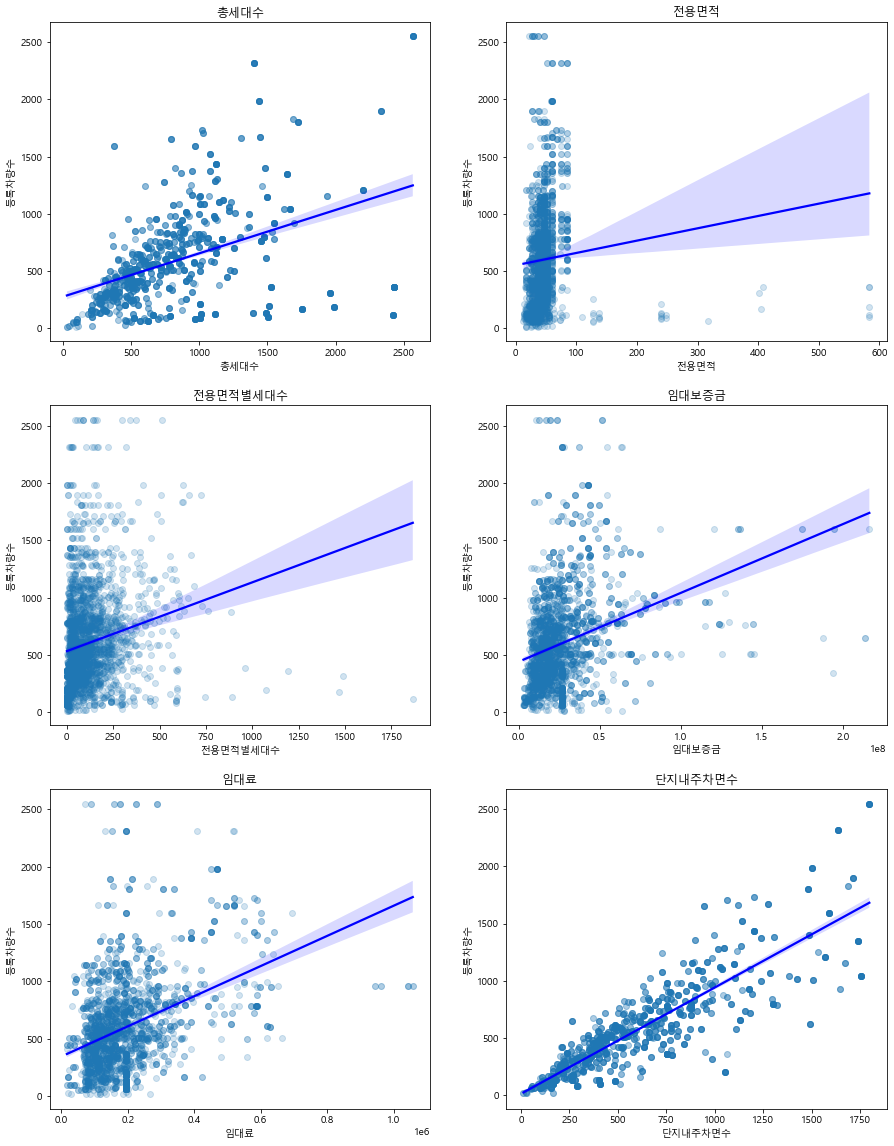

In [87]:
# 산점도(연속형데이터)

figure, axes = plt.subplots(3,2)
figure.set_size_inches(15, 20)

sns.regplot(data=train, x='총세대수', y='등록차량수', ax=axes[0][0],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='전용면적', y='등록차량수', ax=axes[0][1],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='전용면적별세대수', y='등록차량수', ax=axes[1][0],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='임대보증금', y='등록차량수', ax=axes[1][1],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='임대료', y='등록차량수', ax=axes[2][0],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='단지내주차면수', y='등록차량수', ax=axes[2][1],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})

axes[0][0].set(title='총세대수')
axes[0][1].set(title='전용면적')
axes[1][0].set(title='전용면적별세대수')
axes[1][1].set(title='임대보증금')
axes[2][0].set(title='임대료')
axes[2][1].set(title='단지내주차면수')

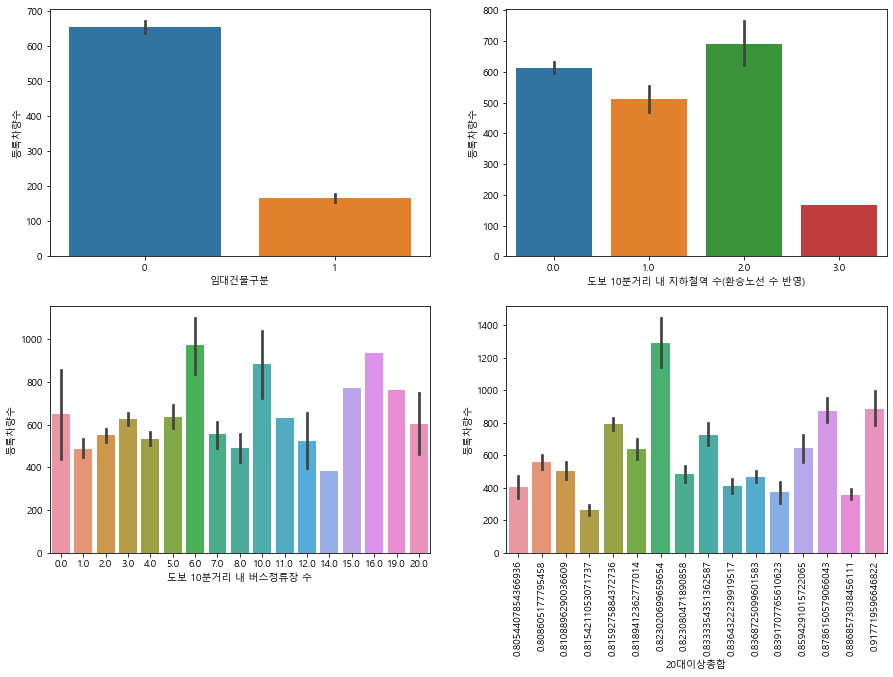

In [88]:
# bar그래프(범주형데이터)
figure, axes = plt.subplots(2,2)
figure.set_size_inches(15, 10)

sns.barplot(data=train, x='임대건물구분', y='등록차량수',ax=axes[0][0])
sns.barplot(data=train, x='도보 10분거리 내 지하철역 수(환승노선 수 반영)', y='등록차량수',ax=axes[0][1])
sns.barplot(data=train, x='도보 10분거리 내 버스정류장 수', y='등록차량수',ax=axes[1][0])
sns.barplot(data=train, x='20대이상총합', y='등록차량수',ax=axes[1][1])

axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=90)

plt.show()

In [89]:
test[test['도보 10분거리 내 버스정류장 수'] == 50]

,단지코드,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
383,C1852,898,0,39.59,219,23720000.0,197230.0,0.0,50.0,785.0,0.815928
384,C1852,898,0,39.72,56,23720000.0,197230.0,0.0,50.0,785.0,0.815928
385,C1852,898,0,39.72,44,23720000.0,197230.0,0.0,50.0,785.0,0.815928
386,C1852,898,0,46.90,46,37454000.0,259660.0,0.0,50.0,785.0,0.815928
387,C1852,898,0,46.90,22,37454000.0,259660.0,0.0,50.0,785.0,0.815928
388,C1852,898,0,46.90,225,37454000.0,259660.0,0.0,50.0,785.0,0.815928
389,C1852,898,0,51.93,136,45193000.0,308350.0,0.0,50.0,785.0,0.815928
390,C1852,898,0,51.93,44,45193000.0,308350.0,0.0,50.0,785.0,0.815928
391,C1852,898,0,59.61,106,61674000.0,370790.0,0.0,50.0,785.0,0.815928


<AxesSubplot:>

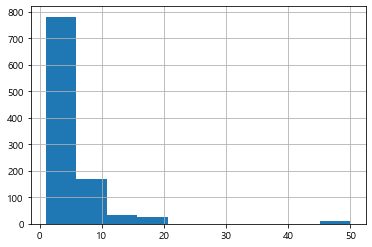

In [90]:
test['도보 10분거리 내 버스정류장 수'].hist()

# 베이스라인 모델 

In [91]:
#선형회기, 경사하강, 다항회귀, 규제모델 회귀트리, 앙상블(배깅,부스팅,랜덤포레스트), 서포트벡터

In [92]:
# 단지코드값이 문자열데이터이기 때문에 이를 제외하고 실시
x_train2 = x_train.drop(['단지코드'],axis=1)

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [94]:
from sklearn.metrics import mean_absolute_error

## 선형회귀( LinearRegression) --> 166.69

In [95]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train2,y_train,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

166.69130119351706

## 선형회귀(kford로 해보기) -->166.69

In [96]:
from sklearn.model_selection import KFold

mae_lis = []

lin_reg = LinearRegression()

kfold = KFold(n_splits=5)
for train_index, valid_index in kfold.split(x_train2):
    # 훈련(학습)
    x_train_2, y_train_2 = x_train2.iloc[train_index], y_train.iloc[train_index] # 4/5
    x_valid, y_valid = x_train2.iloc[valid_index], y_train.iloc[valid_index] # 1/5
    lin_reg.fit(x_train_2, y_train_2)
  
  
    # 예측과 평가(정확도)
    pred = lin_reg.predict(x_valid)
    mae = mean_absolute_error(y_valid, pred)
    mae_lis.append(mae)

print("평균 mae: ", np.mean(mae_lis))

평균 mae:  166.69130119351706


## SGDRegressor -->168.05

In [97]:
from sklearn.linear_model import SGDRegressor

In [98]:
sgd_reg = SGDRegressor(penalty='None', random_state=42)

# 정규화
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train2)

scores = cross_val_score(sgd_reg, x_train_scaled, y_train, scoring="neg_mean_absolute_error", cv=5)
np.mean(-scores)

168.05149725652936

## 다항회귀(LinearRegression) -->316.14

In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 2 , include_bias = False)
x_train_poly = poly_feature.fit_transform(x_train2)


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train_poly,y_train,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

316.1460082357895

## 다항회귀(SGD) --> 201.68

In [100]:
from sklearn.linear_model import SGDRegressor

In [101]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 2, include_bias = False)
x_train_poly = poly_feature.fit_transform(x_train2)

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='None', random_state=42)

# (2) STD Scale (표준화)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train_poly_scaled = std_scaler.fit_transform(x_train_poly)

scores = cross_val_score(sgd_reg, x_train_poly_scaled, y_train, scoring="neg_mean_absolute_error", cv=5)
np.mean(-scores)

201.68785829435492

## 규제모델(릿지) --> 166.14

In [102]:
from sklearn.linear_model import Ridge

rid_params = {'alpha':[1,5,7,10,13]}
ridge = Ridge()
gridsearch_ridge = GridSearchCV(ridge,rid_params,scoring='neg_mean_absolute_error'
                                 ,cv= 5,n_jobs=-1)
gridsearch_ridge.fit(x_train2,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 5, 7, 10, 13]},
             scoring='neg_mean_absolute_error')

In [103]:
cvres = gridsearch_ridge.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) # rmsle와 그 때의 하이퍼 파라미터

166.32219496929454 {'alpha': 1}
166.14561528648153 {'alpha': 5}
166.1766878575922 {'alpha': 7}
166.31066270828944 {'alpha': 10}
166.50856903993719 {'alpha': 13}


In [104]:
gridsearch_ridge.best_params_ 

{'alpha': 5}

In [105]:
best_ridge = gridsearch_ridge.best_estimator_

In [106]:
best_ridge.predict(x_train2)

array([1248.46546124, 1251.549111  , 1292.45361779, ...,  182.7166959 ,
        180.70145151,  189.09042154])

In [107]:
type(x_train2)

pandas.core.frame.DataFrame

In [108]:
x_train2.shape

(2632, 10)

## 베깅 -->169.8

In [109]:
from sklearn.ensemble import BaggingRegressor

In [110]:
bag = BaggingRegressor(LinearRegression())

bag_params = {'n_estimators':[300,500,700,1000],'max_samples':[100,200,300]}

gridsearch_bag = GridSearchCV(bag,bag_params,scoring='neg_mean_absolute_error'
                                 ,cv= 5,n_jobs=-1)
gridsearch_bag.fit(x_train2,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression()),
             n_jobs=-1,
             param_grid={'max_samples': [100, 200, 300],
                         'n_estimators': [300, 500, 700, 1000]},
             scoring='neg_mean_absolute_error')

In [111]:
cvres = gridsearch_bag.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) # rmsle와 그 때의 하이퍼 파라미터

173.33322036680454 {'max_samples': 100, 'n_estimators': 300}
173.74646464553996 {'max_samples': 100, 'n_estimators': 500}
173.4186712940373 {'max_samples': 100, 'n_estimators': 700}
172.46821194424962 {'max_samples': 100, 'n_estimators': 1000}
171.5406232101812 {'max_samples': 200, 'n_estimators': 300}
170.62815326749202 {'max_samples': 200, 'n_estimators': 500}
170.58959218486206 {'max_samples': 200, 'n_estimators': 700}
171.26059103444442 {'max_samples': 200, 'n_estimators': 1000}
170.94578380225875 {'max_samples': 300, 'n_estimators': 300}
169.8913317111364 {'max_samples': 300, 'n_estimators': 500}
170.0274722744413 {'max_samples': 300, 'n_estimators': 700}
170.06366884657228 {'max_samples': 300, 'n_estimators': 1000}


In [112]:
gridsearch_bag.best_params_ 

{'max_samples': 300, 'n_estimators': 500}

## 랜덤포레스트 --> 167.78

In [113]:
# 여러번 시도 후 뽑아낸것 => 5,200이 최고성능

from sklearn.ensemble import RandomForestRegressor
f_params = {'n_estimators':[200,500,800],'max_depth':[3,5,7,10,30,50]},
           

forest = RandomForestRegressor(random_state=42)

gridsearch_forest = GridSearchCV(forest,f_params,scoring='neg_mean_absolute_error'
                                 ,cv= 5,n_jobs=-1)
gridsearch_forest.fit(x_train2,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=({'max_depth': [3, 5, 7, 10, 30, 50],
                          'n_estimators': [200, 500, 800]},),
             scoring='neg_mean_absolute_error')

In [114]:
cvres = gridsearch_forest.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) # rmsle와 그 때의 하이퍼 파라미터

179.09685079049953 {'max_depth': 3, 'n_estimators': 200}
179.15312282023655 {'max_depth': 3, 'n_estimators': 500}
179.17549156734404 {'max_depth': 3, 'n_estimators': 800}
167.78355003734046 {'max_depth': 5, 'n_estimators': 200}
168.0599852132692 {'max_depth': 5, 'n_estimators': 500}
168.3226215346229 {'max_depth': 5, 'n_estimators': 800}
171.33063132665657 {'max_depth': 7, 'n_estimators': 200}
171.62060348223162 {'max_depth': 7, 'n_estimators': 500}
172.0538389006786 {'max_depth': 7, 'n_estimators': 800}
174.95905751126816 {'max_depth': 10, 'n_estimators': 200}
175.31467376316363 {'max_depth': 10, 'n_estimators': 500}
175.9574970798902 {'max_depth': 10, 'n_estimators': 800}
176.38183076961928 {'max_depth': 30, 'n_estimators': 200}
176.8726985837043 {'max_depth': 30, 'n_estimators': 500}
177.43235399365807 {'max_depth': 30, 'n_estimators': 800}
176.38183076961928 {'max_depth': 50, 'n_estimators': 200}
176.8726985837043 {'max_depth': 50, 'n_estimators': 500}
177.43235399365807 {'max_dept

In [115]:
gridsearch_forest.best_params_ 

{'max_depth': 5, 'n_estimators': 200}

In [116]:
sorted(zip(gridsearch_forest.best_estimator_.feature_importances_, x_train2.columns), reverse=True)

[(0.8397137629799655, '단지내주차면수'),
 (0.06567067477251236, '총세대수'),
 (0.038947033910364845, '임대료'),
 (0.03612444936341686, '전용면적'),
 (0.009491796912249667, '20대이상총합'),
 (0.005728819126331917, '도보 10분거리 내 버스정류장 수'),
 (0.002536623989432178, '임대보증금'),
 (0.001137754442585251, '도보 10분거리 내 지하철역 수(환승노선 수 반영)'),
 (0.0006293680333654663, '전용면적별세대수'),
 (1.971646977598622e-05, '임대건물구분')]

In [117]:
best_forest = gridsearch_forest.best_estimator_

In [118]:
# 선형회귀와 랜덤포레스트, 릿지모델을 기본모델로 선정

In [119]:
test

,단지코드,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
0,C1072,754,0,39.79,116,22830000.0,189840.0,0.0,2.0,683.0,0.815928
1,C1072,754,0,46.81,30,36048000.0,249930.0,0.0,2.0,683.0,0.815928
2,C1072,754,0,46.90,112,36048000.0,249930.0,0.0,2.0,683.0,0.815928
3,C1072,754,0,46.90,120,36048000.0,249930.0,0.0,2.0,683.0,0.815928
4,C1072,754,0,51.46,60,43497000.0,296780.0,0.0,2.0,683.0,0.815928
...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,0,36.77,126,25050940.0,177574.0,0.0,1.0,467.0,0.836873
1018,C2189,382,0,29.19,96,6872000.0,106400.0,0.0,2.0,300.0,0.823080
1019,C2189,382,0,29.19,20,6872000.0,106400.0,0.0,2.0,300.0,0.823080
1020,C2189,382,0,39.45,202,13410000.0,144600.0,0.0,2.0,300.0,0.823080


# cross_val_predict를 이용해 답이 잘 추출되는지 확인
 - 같은 단지코드에선 같은 값이 출력되는 모습을 확인하기 위함

In [120]:
y_train # 비교모델(진짜 답)

0       1015.0
1       1015.0
2       1015.0
3       1015.0
4       1015.0
         ...  
2627     146.0
2628     146.0
2629     146.0
2630     146.0
2631     146.0
Name: 등록차량수, Length: 2632, dtype: float64

In [121]:
# x_train을 LinearRegression에 적용했을 때 나오는 답 
from sklearn.model_selection import cross_val_predict
cross_val_predict(lin_reg,  x_train2,y_train,cv=5)

# 단지코드가 같아도 같은 답이 나오지 않는 것을 확인 -> 단지코드 데이터를 활용해야한다는것을 파악

array([1203.52077513, 1199.1594247 , 1286.53885636, ...,  208.49741102,
        207.8877332 ,  213.75492185])

# 단지코드를 사용하기 

## 1) 단지코드OneHot 인코딩 실시

In [122]:
from sklearn.preprocessing import OneHotEncoder

In [123]:
onehot = OneHotEncoder(sparse=False)
x_train_code=onehot.fit_transform(x_train[['단지코드']])
x_train_code

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
onehot.categories_

[array(['C1000', 'C1004', 'C1005', 'C1013', 'C1014', 'C1015', 'C1017',
        'C1022', 'C1024', 'C1026', 'C1027', 'C1032', 'C1036', 'C1039',
        'C1045', 'C1046', 'C1048', 'C1049', 'C1056', 'C1057', 'C1059',
        'C1065', 'C1068', 'C1077', 'C1084', 'C1085', 'C1089', 'C1095',
        'C1102', 'C1103', 'C1109', 'C1122', 'C1129', 'C1131', 'C1133',
        'C1136', 'C1141', 'C1143', 'C1155', 'C1156', 'C1163', 'C1171',
        'C1173', 'C1175', 'C1176', 'C1177', 'C1180', 'C1184', 'C1194',
        'C1206', 'C1207', 'C1210', 'C1213', 'C1218', 'C1227', 'C1234',
        'C1236', 'C1244', 'C1258', 'C1263', 'C1268', 'C1269', 'C1281',
        'C1284', 'C1286', 'C1301', 'C1307', 'C1309', 'C1310', 'C1312',
        'C1316', 'C1319', 'C1320', 'C1326', 'C1328', 'C1329', 'C1338',
        'C1340', 'C1341', 'C1343', 'C1344', 'C1350', 'C1357', 'C1360',
        'C1363', 'C1365', 'C1368', 'C1375', 'C1379', 'C1386', 'C1394',
        'C1397', 'C1402', 'C1406', 'C1407', 'C1410', 'C1424', 'C1426',
      

In [125]:
code = pd.DataFrame(x_train_code,columns=onehot.categories_)
code

,C1000,C1004,C1005,C1013,C1014,C1015,C1017,C1022,C1024,C1026,...,C2650,C2651,C2657,C2659,C2661,C2663,C2666,C2670,C2680,C2692
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
x_train_pcode = pd.concat([code,x_train2],axis = 1)

In [127]:
x_train_pcode

,"(C1000,)","(C1004,)","(C1005,)","(C1013,)","(C1014,)","(C1015,)","(C1017,)","(C1022,)","(C1024,)","(C1026,)",...,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,900,0,39.72,134,15667000.0,103680.0,0.0,3.0,1425.0,0.818941
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,900,0,39.72,15,15667000.0,103680.0,0.0,3.0,1425.0,0.818941
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,900,0,51.93,385,27304000.0,184330.0,0.0,3.0,1425.0,0.818941
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,900,0,51.93,15,27304000.0,184330.0,0.0,3.0,1425.0,0.818941
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,900,0,51.93,41,27304000.0,184330.0,0.0,3.0,1425.0,0.818941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,239,0,49.20,19,11346000.0,116090.0,0.0,1.0,166.0,0.836432
2628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,239,0,51.08,34,14005000.0,142310.0,0.0,1.0,166.0,0.836432
2629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,239,0,51.73,34,14005000.0,142310.0,0.0,1.0,166.0,0.836432
2630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,239,0,51.96,114,14005000.0,142310.0,0.0,1.0,166.0,0.836432


### 단지코드 인코딩한 데이터 모델에 적용해보기
- 선형회귀:153.86 / 랜덤포레스트:169.56 / 릿지 : 157.96

In [128]:
y_train # 비교모델(진짜 답)

0       1015.0
1       1015.0
2       1015.0
3       1015.0
4       1015.0
         ...  
2627     146.0
2628     146.0
2629     146.0
2630     146.0
2631     146.0
Name: 등록차량수, Length: 2632, dtype: float64

In [129]:
# 단지코드를 추가한 후 LinearRegression에 적용했을 때 나오는 답 
from sklearn.model_selection import cross_val_predict
cross_val_predict(lin_reg,  x_train_pcode,y_train,cv=5)

# 단지코드가 같을 때 같은 값을 출력하는 모습을 확인 -> 단지코드를 사용해서 모델을 학습시켜야 한다는 결과 도출

array([1374.69360768, 1374.69360769, 1374.69360755, ...,  219.56651529,
        219.56651507,  219.56651537])

In [130]:
#선형회귀 
lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train_pcode,y_train,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

153.8582235987922

In [131]:
# 랜덤포레스트의 best_model
score = cross_val_score(best_forest,x_train_pcode,y_train,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

169.49656452076925

In [132]:
# 릿지의 best_model
score = cross_val_score(best_ridge,x_train_pcode,y_train,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

157.9568642690204

## 2) 단지코드를 기준으로 그룹화 하기

### 2-1) 단지코드만을 이용해 그룹화

In [133]:
# y값도 그룹화 하기 위해 x,y분리 전 데이터를 이용
train_group = pd.DataFrame(train.groupby(['단지코드']).mean())

In [134]:
x_train_group = train_group.drop(['등록차량수'],axis=1)
y_train_group = train_group['등록차량수']

In [135]:
x_train_group

,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
단지코드,,,,,,,,,,
C1000,566.0,0.000000,45.218571,80.857143,1.320357e+07,121064.285714,0.0,1.0,438.0,0.808605
C1004,521.0,0.866667,43.480667,34.466667,2.387699e+07,183399.600000,0.0,2.0,153.0,0.815421
C1005,1144.0,0.000000,54.360000,381.333333,1.710767e+07,222046.666667,0.0,8.0,950.0,0.815421
C1013,1308.0,0.000000,46.142000,261.600000,2.492480e+07,134726.000000,0.0,6.0,1119.0,0.833335
C1014,996.0,0.000000,49.232857,142.285714,2.389400e+07,160488.571429,0.0,2.0,823.0,0.823080
...,...,...,...,...,...,...,...,...,...,...
C2663,772.0,0.000000,41.005000,128.666667,3.025867e+07,269070.000000,0.0,3.0,700.0,0.815928
C2666,1084.0,0.000000,43.258333,180.666667,1.889050e+07,133145.000000,0.0,1.0,837.0,0.886857
C2670,648.0,0.000000,40.918000,129.600000,1.635000e+07,115188.000000,0.0,2.0,600.0,0.823080


### 단지코드만 그룹화한 데이터에 모델 적용해보기
- 선형회귀 : 130.96 / 랜덤포레스트 : 137.88 / 릿지 : 130.78

In [136]:
#선형회귀 
lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train_group,y_train_group,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

130.96916795100228

In [137]:
# 랜덤포레스트의 best_model
score = cross_val_score(best_forest,x_train_group,y_train_group,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

137.28170009986042

In [138]:
# 릿지의 best_model
score = cross_val_score(best_ridge,x_train_group,y_train_group,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

130.78531914084166

### 2-2) 단지코드와 임대건물 구분을 이용해 그룹화

In [139]:
# y값도 그룹화 하기 위해 x,y분리 전 데이터를 이용
train_group2 = pd.DataFrame(train.groupby(['단지코드','임대건물구분'],as_index=False).mean())
train_group2

,단지코드,임대건물구분,총세대수,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,20대이상총합
0,C1000,0,566.0,45.218571,80.857143,1.320357e+07,121064.285714,0.0,1.0,438.0,481.0,0.808605
1,C1004,0,521.0,39.495000,252.000000,4.705000e+06,104695.000000,0.0,2.0,153.0,93.0,0.815421
2,C1004,1,521.0,44.093846,1.000000,2.682653e+07,195508.000000,0.0,2.0,153.0,93.0,0.815421
3,C1005,0,1144.0,54.360000,381.333333,1.710767e+07,222046.666667,0.0,8.0,950.0,376.0,0.815421
4,C1013,0,1308.0,46.142000,261.600000,2.492480e+07,134726.000000,0.0,6.0,1119.0,1665.0,0.833335
...,...,...,...,...,...,...,...,...,...,...,...,...
451,C2663,0,772.0,41.005000,128.666667,3.025867e+07,269070.000000,0.0,3.0,700.0,652.0,0.815928
452,C2666,0,1084.0,43.258333,180.666667,1.889050e+07,133145.000000,0.0,1.0,837.0,701.0,0.886857
453,C2670,0,648.0,40.918000,129.600000,1.635000e+07,115188.000000,0.0,2.0,600.0,435.0,0.823080
454,C2680,0,758.0,43.350000,252.666667,2.360633e+07,129816.666667,0.0,7.0,564.0,590.0,0.836873


In [140]:
x_train_group2 = train_group2.drop(['등록차량수'],axis=1)
y_train_group2 = train_group2['등록차량수']

### 단지코드 이용을 위해 원핫인코딩 실시

In [141]:
code2 = onehot.fit_transform(x_train_group2[['단지코드']])
code_data = pd.DataFrame(code2,columns=onehot.categories_)

In [142]:
x_train_pcode2 = pd.concat([code_data,x_train_group2],axis = 1)

### 단지코드+임대건물기준 그룹화한 및 단지코드인코딩 데이터에 모델 적용해보기
- 선형회귀 : 138  / 랜덤포레스트 : 131 / 릿지 :129 

In [143]:
x_train_pcode2 = x_train_pcode2.drop(['단지코드'],axis=1)

In [144]:
#선형회귀 
lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train_pcode2,y_train_group2,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

138.01561310777817

In [145]:
# 랜덤포레스트의 best_model
score = cross_val_score(best_forest,x_train_pcode2,y_train_group2,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

131.93227704476368

In [146]:
# 릿지의 best_model
score = cross_val_score(best_ridge,x_train_pcode2,y_train_group2,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

129.9919035534106

In [147]:
# test 데이터도 그룹화 및 인코딩 실시
# y값도 그룹화 하기 위해 x,y분리 전 데이터를 이용
test_group = pd.DataFrame(test.groupby(['단지코드','임대건물구분'],as_index=False).mean())

code = onehot.fit_transform(test_group[['단지코드']])
test_code = pd.DataFrame(code,columns=onehot.categories_)

test_group_onehot = pd.concat([test_code,test_group],axis=1)

In [148]:
test_group_onehot=test_group_onehot.drop(['단지코드'],axis=1)

# test값 예측

## 1) 단지코드+임대건물기준 (onehot인코딩 한 데이터)

In [149]:
lin_reg.fit(x_train_pcode2,y_train_group2)

LinearRegression()

In [150]:
# y_pred = lin_reg.predict(test_group_onehot)

In [151]:
# 학습 데이터와 테스트 데이터의 컬럼수가 달라서 적용이 안됨
#(학습데이터와 테스트데이터에 들어있는 단지코드의 숫자가 달라서 컬럼수가 달라짐)
x_train_pcode2.shape, test_group_onehot.shape 

((456, 433), (157, 160))

## 2) 단지코드로만

In [152]:
# x_train_group,y_train_group

In [153]:
test

,단지코드,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
0,C1072,754,0,39.79,116,22830000.0,189840.0,0.0,2.0,683.0,0.815928
1,C1072,754,0,46.81,30,36048000.0,249930.0,0.0,2.0,683.0,0.815928
2,C1072,754,0,46.90,112,36048000.0,249930.0,0.0,2.0,683.0,0.815928
3,C1072,754,0,46.90,120,36048000.0,249930.0,0.0,2.0,683.0,0.815928
4,C1072,754,0,51.46,60,43497000.0,296780.0,0.0,2.0,683.0,0.815928
...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,0,36.77,126,25050940.0,177574.0,0.0,1.0,467.0,0.836873
1018,C2189,382,0,29.19,96,6872000.0,106400.0,0.0,2.0,300.0,0.823080
1019,C2189,382,0,29.19,20,6872000.0,106400.0,0.0,2.0,300.0,0.823080
1020,C2189,382,0,39.45,202,13410000.0,144600.0,0.0,2.0,300.0,0.823080


In [154]:
# test 데이터 가공
test_group_1 = pd.DataFrame(test.groupby(['단지코드']).mean())

In [155]:
test_group_1

,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
단지코드,,,,,,,,,,
C1003,480.0,0.000000,32.136250,60.000000,2.265000e+07,115875.000000,0.0,3.0,339.0,0.836873
C1006,1505.0,0.740741,60.894074,55.740741,2.223725e+07,163671.555556,2.0,5.0,428.0,0.859429
C1016,643.0,0.000000,48.142500,160.750000,2.402675e+07,228010.000000,1.0,4.0,646.0,0.815928
C1019,321.0,0.000000,44.875000,80.250000,1.485750e+07,126430.000000,0.0,3.0,259.0,0.805441
C1030,75.0,0.000000,26.338333,11.666667,5.141333e+07,214216.666667,1.0,2.0,29.0,0.815928
...,...,...,...,...,...,...,...,...,...,...
C2653,879.0,0.000000,53.810000,219.750000,2.351175e+07,243055.000000,0.0,16.0,802.0,0.815928
C2675,512.0,0.000000,46.938750,64.000000,3.456550e+07,233448.750000,0.0,3.0,1016.0,0.815928
C2676,2572.0,0.934783,53.871957,55.913043,2.381820e+07,171535.478261,0.0,2.0,418.0,0.886857


In [156]:
lin_reg.fit(x_train_group,y_train_group)
y_pred = lin_reg.predict(test_group_1)

In [157]:
# y_pred를 다시 test데이터의 단지코드에 맞춰 분산시켜줘야함
# 이를 위해 test데이터와 y_pred데이터를 병합
test_group_1['y_pred'] = y_pred

In [158]:
# merge를 위해 단지코드와 y_pred로 이루어진 데이터프레임을 생성
test_group_code_y = pd.DataFrame({'num':test_group_1['y_pred'].values,'단지코드':test_group_1.index})
test_group_code_y

,num,단지코드
0,285.579942,C1003
1,352.222801,C1006
2,642.279935,C1016
3,292.872666,C1019
4,45.386937,C1030
...,...,...
145,862.693215,C2653
146,936.004562,C2675
147,335.047951,C2676
148,90.749394,C2688


In [159]:
# 최종 테스트 데이터 작성
test_pryd_group1 = pd.merge(test,test_group_code_y,how='left',left_on='단지코드',right_on='단지코드')

In [160]:
test_pryd_group1

,단지코드,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합,num
0,C1072,754,0,39.79,116,22830000.0,189840.0,0.0,2.0,683.0,0.815928,713.535754
1,C1072,754,0,46.81,30,36048000.0,249930.0,0.0,2.0,683.0,0.815928,713.535754
2,C1072,754,0,46.90,112,36048000.0,249930.0,0.0,2.0,683.0,0.815928,713.535754
3,C1072,754,0,46.90,120,36048000.0,249930.0,0.0,2.0,683.0,0.815928,713.535754
4,C1072,754,0,51.46,60,43497000.0,296780.0,0.0,2.0,683.0,0.815928,713.535754
...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,0,36.77,126,25050940.0,177574.0,0.0,1.0,467.0,0.836873,386.380647
1018,C2189,382,0,29.19,96,6872000.0,106400.0,0.0,2.0,300.0,0.823080,267.754655
1019,C2189,382,0,29.19,20,6872000.0,106400.0,0.0,2.0,300.0,0.823080,267.754655
1020,C2189,382,0,39.45,202,13410000.0,144600.0,0.0,2.0,300.0,0.823080,267.754655


### 1차 시도용 제출용 샘플 만들기

- 1차 시도 : 113점!

In [161]:
sample = pd.read_csv('./dataset/sample_submission.csv')

sample=sample.drop(['num'],axis=1)

# 최종 테스트 데이터 작성
samples = pd.merge(sample,test_group_code_y,how='left',left_on='code',right_on='단지코드')

samples = samples.drop(['단지코드'], axis=1)

samples.to_csv('1번시도.csv', index=False)

# 성능올리기 

## 1차 수정 
- test 데이터에 버스정류장이 50개인 말도 안되는 값이 존재 
- 버스정류장 수의 평균값인 4로 변경

In [162]:
test_group_2 = pd.DataFrame(test.groupby(['단지코드']).mean())
test_group_2[test_group_2['도보 10분거리 내 버스정류장 수']!=50]['도보 10분거리 내 버스정류장 수'].mean()

4.275167785234899

In [163]:
test_group_2

,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
단지코드,,,,,,,,,,
C1003,480.0,0.000000,32.136250,60.000000,2.265000e+07,115875.000000,0.0,3.0,339.0,0.836873
C1006,1505.0,0.740741,60.894074,55.740741,2.223725e+07,163671.555556,2.0,5.0,428.0,0.859429
C1016,643.0,0.000000,48.142500,160.750000,2.402675e+07,228010.000000,1.0,4.0,646.0,0.815928
C1019,321.0,0.000000,44.875000,80.250000,1.485750e+07,126430.000000,0.0,3.0,259.0,0.805441
C1030,75.0,0.000000,26.338333,11.666667,5.141333e+07,214216.666667,1.0,2.0,29.0,0.815928
...,...,...,...,...,...,...,...,...,...,...
C2653,879.0,0.000000,53.810000,219.750000,2.351175e+07,243055.000000,0.0,16.0,802.0,0.815928
C2675,512.0,0.000000,46.938750,64.000000,3.456550e+07,233448.750000,0.0,3.0,1016.0,0.815928
C2676,2572.0,0.934783,53.871957,55.913043,2.381820e+07,171535.478261,0.0,2.0,418.0,0.886857


In [164]:
test_group_2[test_group_2['도보 10분거리 내 버스정류장 수']==50] = 4.0

In [165]:
test_group_2[test_group_2['도보 10분거리 내 버스정류장 수']==50]

,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
단지코드,,,,,,,,,,


## test값 예측하기

In [166]:
best_ridge.fit(x_train_group,y_train_group)
y_pred_2 = best_ridge.predict(test_group_2)

In [167]:
test_group_2['y_pred_2']=y_pred_2

In [168]:
test_group_2

,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합,y_pred_2
단지코드,,,,,,,,,,,
C1003,480.0,0.000000,32.136250,60.000000,2.265000e+07,115875.000000,0.0,3.0,339.0,0.836873,287.851599
C1006,1505.0,0.740741,60.894074,55.740741,2.223725e+07,163671.555556,2.0,5.0,428.0,0.859429,361.921676
C1016,643.0,0.000000,48.142500,160.750000,2.402675e+07,228010.000000,1.0,4.0,646.0,0.815928,624.039835
C1019,321.0,0.000000,44.875000,80.250000,1.485750e+07,126430.000000,0.0,3.0,259.0,0.805441,277.501184
C1030,75.0,0.000000,26.338333,11.666667,5.141333e+07,214216.666667,1.0,2.0,29.0,0.815928,14.405812
...,...,...,...,...,...,...,...,...,...,...,...
C2653,879.0,0.000000,53.810000,219.750000,2.351175e+07,243055.000000,0.0,16.0,802.0,0.815928,856.235452
C2675,512.0,0.000000,46.938750,64.000000,3.456550e+07,233448.750000,0.0,3.0,1016.0,0.815928,965.641830
C2676,2572.0,0.934783,53.871957,55.913043,2.381820e+07,171535.478261,0.0,2.0,418.0,0.886857,331.383320


In [169]:
# merge를 위해 단지코드와 y_pred로 이루어진 데이터프레임을 생성
test_group_code_y2 = pd.DataFrame({'num':test_group_2['y_pred_2'].values,'단지코드':test_group_2.index})
test_group_code_y2

,num,단지코드
0,287.851599,C1003
1,361.921676,C1006
2,624.039835,C1016
3,277.501184,C1019
4,14.405812,C1030
...,...,...
145,856.235452,C2653
146,965.641830,C2675
147,331.383320,C2676
148,88.056816,C2688


In [170]:
# 최종 테스트 데이터 작성
test_pryd_group2 = pd.merge(test,test_group_code_y2,how='left',left_on='단지코드',right_on='단지코드')

### 1차 수정용 제출용 샘플 만들기

- 1차 수정 : 149점 ㅠㅠ

In [171]:
sample = pd.read_csv('./dataset/sample_submission.csv')

sample=sample.drop(['num'],axis=1)

# 최종 테스트 데이터 작성
samples = pd.merge(sample,test_group_code_y2,how='left',left_on='code',right_on='단지코드')

samples = samples.drop(['단지코드'], axis=1)

samples.to_csv('2번시도.csv', index=False)

## 2차 수정(단지코드 + 임대건물구분의 값을 이용하기)

- 단지코드의 값을 숫자형 자료로 바꿔줘야함
- 코드 앞에 c값을 제거 후 숫자형 자료로 변경

In [172]:
code_list = list(x_train_group2['단지코드'])

In [173]:
# c값 제거
new = []

for i in code_list: 
    new.append(i[1:])

x_train_group2['숫자단지코드'] = new

x_train_group2['숫자단지코드'] = x_train_group2['숫자단지코드'].astype(int)

x_train_group2 = x_train_group2.drop(['단지코드'],axis=1)

In [177]:
x_train_group2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   임대건물구분                        456 non-null    int64  
 1   총세대수                          456 non-null    float64
 2   전용면적                          456 non-null    float64
 3   전용면적별세대수                      456 non-null    float64
 4   임대보증금                         456 non-null    float64
 5   임대료                           456 non-null    float64
 6   도보 10분거리 내 지하철역 수(환승노선 수 반영)  456 non-null    float64
 7   도보 10분거리 내 버스정류장 수            456 non-null    float64
 8   단지내주차면수                       456 non-null    float64
 9   20대이상총합                       456 non-null    float64
 10  숫자단지코드                        456 non-null    int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 37.5 KB


### 2차 수정(숫자단지코드+임대건물구분) 데이터에 모델 적용해보기
- 선형회귀 : 128  / 랜덤포레스트 : 131 / 릿지 :129 

In [178]:
#선형회귀 
lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train_group2,y_train_group2,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

128.1479502781911

In [179]:
# 랜덤포레스트의 best_model
score = cross_val_score(best_forest,x_train_pcode2,y_train_group2,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

131.93227704476368

In [180]:
# 릿지의 best_model
score = cross_val_score(best_ridge,x_train_pcode2,y_train_group2,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

129.9919035534106

## test값 예측하기

In [284]:
# test데이터 가공하기
test_group = pd.DataFrame(test.groupby(['단지코드','임대건물구분'],as_index=False).mean())

In [285]:
test_group_list = list(test_group['단지코드'])

In [286]:
# 코드의 C값 제거
new2 = []
for i in test_group_list:
    new2.append(i[1:])

In [287]:
test_group['숫자단지코드'] = new2
test_group['숫자단지코드'] = test_group['숫자단지코드'].astype(int)

In [288]:
test_code=test_group['단지코드']
test_group = test_group.drop(['단지코드'],axis=1)

In [289]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_group2,y_train_group2)
y_pred_3 = lin_reg.predict(test_group)

In [290]:
# merge를 위해 단지코드와 y_pred로 이루어진 데이터프레임을 생성
test_group_code_y3 = pd.DataFrame({'num':y_pred_3,'단지코드':test_code})
test_group_code_y3

,num,단지코드
0,289.550869,C1003
1,326.799166,C1006
2,333.028707,C1006
3,639.539952,C1016
4,290.367841,C1019
...,...,...
152,960.925286,C2675
153,243.699711,C2676
154,301.406317,C2676
155,104.444596,C2688


In [291]:
# 최종 테스트 데이터 작성
test_pryd_group3 = pd.merge(test,test_group_code_y3,how='left',left_on='단지코드',right_on='단지코드')

### 2차 수정용 제출용 샘플 만들기

- 2차 수정 : 112점!

In [292]:
sample = pd.read_csv('./dataset/sample_submission.csv')

sample=sample.drop(['num'],axis=1)

# 최종 테스트 데이터 작성
samples = pd.merge(sample,test_group_code_y3,how='left',left_on='code',right_on='단지코드')

samples = samples.drop(['단지코드'], axis=1)

samples.to_csv('3번시도.csv', index=False)

## 3차 수정(전용면적과 전용면적별세대수를 조금 더 활용해보기)
- 전용면적이 넓은 집일수록 가족구성원의 수가 늘어 더 많은 차량을 소유 할 확률이 높다고 판단
- 전용면적을 cut을 이용해 그룹으로 나누고, 해당 그룹에 속하는 세대수의 개수를 구해서 새로운 컬럼으로 추가
- 2차수정데이터를 활용

In [463]:
train_cut = train.copy()

In [668]:
# 5개 영역으로 범주화
labels = ['소','소중','중','중대','대']
train_cut['전용면적범주화']=pd.cut(train['전용면적'],bins=5,labels=labels)

In [669]:
train_cut['전용면적범주화'].value_counts()

소     2611
소중      10
대        5
중        3
중대       3
Name: 전용면적범주화, dtype: int64

In [603]:
# 전용면적의 범주를 새로운 컬럼으로 변경해주기 위해 
train_cut_1 = train_cut[['단지코드','임대건물구분','전용면적범주화','전용면적별세대수']]
train_cut_2 = train_cut.drop(['전용면적범주화','전용면적','전용면적별세대수'],axis=1)

train_cut_1_group = pd.DataFrame(train_cut_1.groupby(['단지코드','임대건물구분','전용면적범주화'],as_index=False).sum())
train_cut_2_group = pd.DataFrame(train_cut_2.groupby(['단지코드','임대건물구분'],as_index=False).mean())

In [607]:
# 단지코드와 임대건물구분에 따른 전용면적범주화를 컬럼으로 변경해줌

a=[]
b=[]
for i in set(train_cut_1_group['단지코드']):
    x = train_cut_1_group[train_cut_1_group['단지코드']==i]
    for j in set(x['임대건물구분']):
        y = list(str(j))+list(x[x['임대건물구분']==j]['전용면적별세대수'].values)
        a.append(y)
        b.append(i)
        
        
a=np.array(a)
column=['임대건물구분','소','소중','중','중대','대']
x = pd.DataFrame(a,index=b,columns=column)
x=x.reset_index()

In [617]:
# 두가지 조건을 이용해 merge해주기 위해 임대건물구분과 

x['임대건물구분']= x['임대건물구분'].astype(str)

x['임대별 단지 면적'] = x.apply(lambda r : r['index'] + '_' +r['임대건물구분'], axis=1)

train_cut_2_group['임대건물구분']=train_cut_2_group['임대건물구분'].astype(str)

train_cut_2_group['임대별 단지 면적'] = train_cut_2_group.apply(lambda r : r['단지코드'] + '_' +r['임대건물구분'], axis=1)

train_x = pd.merge(train_cut_2_group,x,how='left',left_on='임대별 단지 면적',right_on='임대별 단지 면적')

train_x=train_x.drop(['임대별 단지 면적','index','임대건물구분_y'],axis=1)

In [631]:
# x,y값 나누기 
x_train_x = train_x.drop(['등록차량수'],axis=1)
y_train_x = train_x['등록차량수']

In [641]:
code_list = list(x_train_x['단지코드'])

# c값 제거
new = []

for i in code_list: 
    new.append(i[1:])

x_train_x['숫자단지코드'] = new

x_train_x['숫자단지코드'] = x_train_x['숫자단지코드'].astype(int)

x_train_x = x_train_x.drop(['단지코드'],axis=1)

In [642]:
x_train_x['임대건물구분_x']= x_train_x['임대건물구분_x'].astype(int)

In [701]:
x_train_x

,임대건물구분_x,총세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합,소,소중,중,중대,대,숫자단지코드
0,0,566.0,1.320357e+07,121064.285714,0.0,1.0,438.0,0.808605,566,0,0,0,0,1000
1,0,521.0,4.705000e+06,104695.000000,0.0,2.0,153.0,0.815421,504,0,0,0,0,1004
2,1,521.0,2.682653e+07,195508.000000,0.0,2.0,153.0,0.815421,12,1,0,0,0,1004
3,0,1144.0,1.710767e+07,222046.666667,0.0,8.0,950.0,0.815421,1144,0,0,0,0,1005
4,0,1308.0,2.492480e+07,134726.000000,0.0,6.0,1119.0,0.833335,1308,0,0,0,0,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0,772.0,3.025867e+07,269070.000000,0.0,3.0,700.0,0.815928,772,0,0,0,0,2663
452,0,1084.0,1.889050e+07,133145.000000,0.0,1.0,837.0,0.886857,1084,0,0,0,0,2666
453,0,648.0,1.635000e+07,115188.000000,0.0,2.0,600.0,0.823080,648,0,0,0,0,2670
454,0,758.0,2.360633e+07,129816.666667,0.0,7.0,564.0,0.836873,758,0,0,0,0,2680


In [739]:
x_train_x['소']= x_train_x['소'].astype(int)
x_train_x['소중']= x_train_x['소중'].astype(int)
x_train_x['중']= x_train_x['중'].astype(int)
x_train_x['중대']= x_train_x['중대'].astype(int)
x_train_x['대']= x_train_x['대'].astype(int)

In [740]:
# 중복되는 내용의 컬럼(총세대수)와 상관관계가 적은 컬럼(지하철,버스)제거
x_train_x2=x_train_x.drop(['총세대수','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수'],axis=1)

### 3차 수정(전용면적과 전용면적별세대수를 조금 더 활용해보기) 데이터에 모델 적용해보기
- 선형회귀 : 130   / 랜덤포레스트 : 135 / 릿지 : 130

In [745]:
#선형회귀 
lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train_x2,y_train_x,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

130.5713435034944

In [746]:
# 랜덤포레스트의 best_model
score = cross_val_score(best_forest,x_train_x2,y_train_x,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

135.52959402712932

In [747]:
# 릿지의 best_model
score = cross_val_score(best_ridge,x_train_x2,y_train_x,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

130.83530826510906

## test값 예측하기

In [722]:
test_cut = test.copy()

In [723]:
# 5개 영역으로 범주화
labels = ['소','소중','중','중대','대']
test_cut['전용면적범주화']=pd.cut(test['전용면적'],bins=5,labels=labels)

In [724]:
test_cut['전용면적범주화'].value_counts()

소     1013
중        4
중대       3
대        2
소중       0
Name: 전용면적범주화, dtype: int64

In [ ]:
train_cut_1 = train_cut[['단지코드','임대건물구분','전용면적범주화','전용면적별세대수']]
train_cut_2 = train_cut.drop(['전용면적범주화','전용면적','전용면적별세대수'],axis=1)

In [725]:
# 전용면적의 범주를 새로운 컬럼으로 변경해주기 위해 
test_cut_1 = test_cut[['단지코드','임대건물구분','전용면적범주화','전용면적별세대수']]
test_cut_2 = test_cut.drop(['전용면적범주화','전용면적','전용면적별세대수'],axis=1)

test_cut_1_group = pd.DataFrame(test_cut_1.groupby(['단지코드','임대건물구분','전용면적범주화'],as_index=False).sum())
test_cut_2_group = pd.DataFrame(test_cut_2.groupby(['단지코드','임대건물구분'],as_index=False).mean())

In [726]:
# 단지코드와 임대건물구분에 따른 전용면적범주화를 컬럼으로 변경해줌

a=[]
b=[]
for i in set(test_cut_1_group['단지코드']):
    x = test_cut_1_group[test_cut_1_group['단지코드']==i]
    for j in set(x['임대건물구분']):
        y = list(str(j))+list(x[x['임대건물구분']==j]['전용면적별세대수'].values)
        a.append(y)
        b.append(i)
        
        
a=np.array(a)
column=['임대건물구분','소','소중','중','중대','대']
x = pd.DataFrame(a,index=b,columns=column)
x=x.reset_index()

In [727]:
# 두가지 조건을 이용해 merge해주기 위해 임대건물구분과 

x['임대건물구분']= x['임대건물구분'].astype(str)

x['임대별 단지 면적'] = x.apply(lambda r : r['index'] + '_' +r['임대건물구분'], axis=1)

test_cut_2_group['임대건물구분']=test_cut_2_group['임대건물구분'].astype(str)

test_cut_2_group['임대별 단지 면적'] = test_cut_2_group.apply(lambda r : r['단지코드'] + '_' +r['임대건물구분'], axis=1)

test_x = pd.merge(test_cut_2_group,x,how='left',left_on='임대별 단지 면적',right_on='임대별 단지 면적')

test_x=test_x.drop(['임대별 단지 면적','index','임대건물구분_y'],axis=1)

In [728]:
code_list = list(test_x['단지코드'])

# c값 제거
new = []

for i in code_list: 
    new.append(i[1:])

test_x['숫자단지코드'] = new

test_x['숫자단지코드'] = test_x['숫자단지코드'].astype(int)

test_x = test_x.drop(['단지코드'],axis=1)

In [729]:
test_x['임대건물구분_x']= test_x['임대건물구분_x'].astype(int)

In [748]:
test_x['소']= test_x['소'].astype(int)
test_x['소중']= test_x['소중'].astype(int)
test_x['중']= test_x['중'].astype(int)
test_x['중대']= test_x['중대'].astype(int)
test_x['대']= test_x['대'].astype(int)

In [749]:
# 중복되는 내용의 컬럼(총세대수)와 상관관계가 적은 컬럼(지하철,버스)제거
test_x2=test_x.drop(['총세대수','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수'],axis=1)

In [753]:
#선형회귀 
lin_reg = LinearRegression()
lin_reg.fit(x_train_x2,y_train_x)
y_pred_4 = lin_reg.predict(test_x2)

### 3차 수정용 제출용 샘플 만들기

- 3차 수정 : 120점

In [756]:
# merge를 위해 단지코드와 y_pred로 이루어진 데이터프레임을 생성
test_group_code_y4 = pd.DataFrame({'num':y_pred_4,'단지코드':code_list})
test_group_code_y4

sample = pd.read_csv('./dataset/sample_submission.csv')

sample=sample.drop(['num'],axis=1)

# 최종 테스트 데이터 작성
samples = pd.merge(sample,test_group_code_y4,how='left',left_on='code',right_on='단지코드')

samples = samples.drop(['단지코드'], axis=1)

samples.to_csv('4번시도.csv', index=False)

,num,단지코드
0,308.277185,C1003
1,368.630051,C1006
2,243.034496,C1006
3,660.031362,C1016
4,274.721259,C1019
...,...,...
152,970.046957,C2675
153,309.564143,C2676
154,166.664937,C2676
155,124.021895,C2688


## 4차 수정(2번째 수정사항에서 비슷한 성향을 가진 컬럼 삭제)

- 전용면적별 세대수는 총세대수와 연관되어있음 ==> 전용면적별세대수 삭제
- 임대보증금은 임대료와 상관관계가 높음 ==> 임대보증금 삭제

In [784]:
x_train_group2=x_train_group2.drop(['전용면적별세대수'],axis=1)

KeyError: "['전용면적별세대수'] not found in axis"

In [ ]:
x_train_group2=x_train_group2.drop(['임대보증금'],axis=1)

In [ ]:
### 4차 수정(전용면적과 전용면적별세대수를 조금 더 활용해보기) 데이터에 모델 적용해보기
- 선형회귀 : 130   / 랜덤포레스트 : 135 / 릿지 : 130

In [787]:
#선형회귀 
lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train_group2,y_train_group2,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

127.72115781567513

In [785]:
# 랜덤포레스트의 best_model
score = cross_val_score(best_forest,x_train_group2,y_train_group2,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

131.36405616834136

In [786]:
# 릿지의 best_model
score = cross_val_score(best_ridge,x_train_group2,y_train_group2,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

127.42484928838626

## test값 예측하기

In [778]:
test_group=test_group.drop(['임대보증금','전용면적별세대수'],axis=1)

In [780]:
#선형회귀 
lin_reg = LinearRegression()
lin_reg.fit(x_train_group2,y_train_group2)
y_pred_5 = lin_reg.predict(test_group)

### 4차 수정용 제출용 샘플 만들기

- 4차 수정 : 113점

In [782]:
# merge를 위해 단지코드와 y_pred로 이루어진 데이터프레임을 생성
test_group_code_y5 = pd.DataFrame({'num':y_pred_5,'단지코드':code_list})
test_group_code_y5

sample = pd.read_csv('./dataset/sample_submission.csv')

sample=sample.drop(['num'],axis=1)

# 최종 테스트 데이터 작성
samples = pd.merge(sample,test_group_code_y5,how='left',left_on='code',right_on='단지코드')

samples = samples.drop(['단지코드'], axis=1)

samples.to_csv('5번시도.csv', index=False)